<a href="https://www.kaggle.com/code/mateusmmiguel/loggi-deliveries-project?scriptVersionId=148268706" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Loggi Deliveries Project
## Data

This project aims to analyse the data from the repository [Loggi Benchmark for Urban Deliveries (BUD)](https://github.com/loggi/loggibud). In it, there is data in the JSON format describing the names and location of transportation centers of the company, including the geografical data (latitude and longitude), and all the deliveries associated. The data consists of:

* `name`: the name of the delivery instance;
* `region`: the name of the hub;
* `origin`: the location of the hub with `lat` and `lng`;
* `vehicle_capacity`: the item capacity of the delivery vehicles;
* `deliveries`: list of deliveries, containing dictionaries with the data `id`, `point` (with `lat` and `lng` of delivery) and `size`. 

# 1. Extract, transform and load

Firstly, we extract the desired JSON file to be transformed. The libraries used are Numpy, Pandas and Seaborn. 

In [1]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries.json" -O deliveries.json

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import json

with open('../input/deliveries-data/deliveries.json', mode='r', encoding='utf8') as file:
  data = json.load(file)

len(data), type(data[0])

(199, dict)

We then have a list containing dictionaries of the delivery regions and their respective deliveries to various locations of the city of Brasilia (DF). We can use the first element as an example.

In [4]:
example = data[0]
example.keys()

dict_keys(['name', 'region', 'origin', 'vehicle_capacity', 'deliveries'])

It is possible to visualize our JSON document using the `json` Python package, as follows.

In [5]:
json_formatted_str = json.dumps(example, indent=2)
print(json_formatted_str[0:500])

{
  "name": "cvrp-2-df-33",
  "region": "df-2",
  "origin": {
    "lng": -48.05498915846707,
    "lat": -15.83814451122274
  },
  "vehicle_capacity": 180,
  "deliveries": [
    {
      "id": "313483a19d2f8d65cd5024c8d215cfbd",
      "point": {
        "lng": -48.11618888384239,
        "lat": -15.848929154862294
      },
      "size": 9
    },
    {
      "id": "320c94b17aa685c939b3f3244c3099de",
      "point": {
        "lng": -48.11819489551,
        "lat": -15.850772371049631
      },
      "


## 1.1 - Data Wrangling

We need to put this semi-structured data (JSON format) into a structured table (CSV format) to be able to better manipulate it. For that, we use Pandas to create a DataFrame.

In [6]:
deliveries_df = pd.DataFrame(data)
deliveries_df.head()

,name,region,origin,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


As can be seen, the 'origin' column contains two informations 'lat' and 'lng' that we wish to separate into two individual columns. This procedure is called normalization or flattening, and can be done by the `pd.json_normalize()` method.

In [7]:
hub_origin_df = pd.json_normalize(deliveries_df['origin'])
hub_origin_df.head()

,lng,lat
0,-48.054989,-15.838145
1,-48.054989,-15.838145
2,-48.054989,-15.838145
3,-47.893662,-15.805118
4,-48.054989,-15.838145


We can confirm that there are only three unique values of 'lat' and 'lng' corresponding to the three hub regions.

In [8]:
deliveries_df['region'].unique()

array(['df-2', 'df-1', 'df-0'], dtype=object)

In [9]:
hub_origin_df['lat'].unique()

array([-15.83814451, -15.80511751, -15.65701385])

In [10]:
deliveries_df = pd.merge(left=deliveries_df, right=hub_origin_df, how='inner', left_index=True, right_index=True)
deliveries_df.head()

,name,region,origin,vehicle_capacity,deliveries,lng,lat
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p...",-48.054989,-15.838145
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po...",-48.054989,-15.838145
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p...",-48.054989,-15.838145
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p...",-47.893662,-15.805118
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p...",-48.054989,-15.838145


Now, the 'origin' column can be eliminated, as it's contents have been extracted. We then reorder the columns.

In [11]:
deliveries_df = deliveries_df.drop(['origin'], axis=1)
deliveries_df = deliveries_df[['name', 'region', 'lat', 'lng', 'vehicle_capacity', 'deliveries']]
deliveries_df = deliveries_df.rename(columns={
    'lat': 'hub_lat',
    'lng': 'hub_lng'
})
deliveries_df.head()

,name,region,hub_lat,hub_lng,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-15.838145,-48.054989,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-15.838145,-48.054989,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-15.838145,-48.054989,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-15.805118,-47.893662,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-15.838145,-48.054989,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


Another similar problem occurs with the 'deliveries' column, that has some depth to it. We need to expand the elements of the lists in each row into many rows, then extract the values from the keys of the dictionaries. This process is a **normalization explosion** (expanding the lists into many more rows than before).

In [12]:
deliveries_exploded_df = deliveries_df[['deliveries']].explode('deliveries')
deliveries_exploded_df.head()

,deliveries
0,"{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'po..."
0,"{'id': '320c94b17aa685c939b3f3244c3099de', 'po..."
0,"{'id': '3663b42f4b8decb33059febaba46d5c8', 'po..."
0,"{'id': 'e11ab58363c38d6abc90d5fba87b7d7', 'poi..."
0,"{'id': '54cb45b7bbbd4e34e7150900f92d7f4b', 'po..."


Now we have many more rows than the 199 rows of the original DataFrame.

In [13]:
deliveries_exploded_df.shape

(636149, 1)

We then apply some functional programming to extract the desired key-value pairs and create new columns in this DataFrame.

In [14]:
deliveries_exploded_df['delivery_id'] = deliveries_exploded_df['deliveries'].apply(lambda x: x['id'])
deliveries_exploded_df['delivery_point_lng'] = deliveries_exploded_df['deliveries'].apply(lambda x: x['point']['lng'])
deliveries_exploded_df['delivery_point_lat'] = deliveries_exploded_df['deliveries'].apply(lambda x: x['point']['lat'])
deliveries_exploded_df['delivery_size'] = deliveries_exploded_df['deliveries'].apply(lambda x: x['size'])
deliveries_exploded_df.head()

,deliveries,delivery_id,delivery_point_lng,delivery_point_lat,delivery_size
0,"{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'po...",313483a19d2f8d65cd5024c8d215cfbd,-48.116189,-15.848929,9
0,"{'id': '320c94b17aa685c939b3f3244c3099de', 'po...",320c94b17aa685c939b3f3244c3099de,-48.118195,-15.850772,2
0,"{'id': '3663b42f4b8decb33059febaba46d5c8', 'po...",3663b42f4b8decb33059febaba46d5c8,-48.112483,-15.847871,1
0,"{'id': 'e11ab58363c38d6abc90d5fba87b7d7', 'poi...",e11ab58363c38d6abc90d5fba87b7d7,-48.118023,-15.846471,2
0,"{'id': '54cb45b7bbbd4e34e7150900f92d7f4b', 'po...",54cb45b7bbbd4e34e7150900f92d7f4b,-48.114898,-15.858055,7


Then the 'deliveries' column can be dropped because it's contents have been extracted.

In [15]:
deliveries_exploded_df = deliveries_exploded_df.drop(['deliveries'], axis=1)
deliveries_exploded_df.columns

Index(['delivery_id', 'delivery_point_lng', 'delivery_point_lat',
       'delivery_size'],
      dtype='object')

Finally, we merge this new dataframe to the original one using a "right join". This means that every repeated index in the new dataframe receives the rest of the original data copied on many rows. The final dataframe will have 636149 rows.

In [16]:
deliveries_df = pd.merge(left=deliveries_df, right=deliveries_exploded_df, how='right', left_index=True, right_index=True)
deliveries_df = deliveries_df.drop(['deliveries'], axis=1)
deliveries_df.head()

,name,region,hub_lat,hub_lng,vehicle_capacity,delivery_id,delivery_point_lng,delivery_point_lat,delivery_size
0,cvrp-2-df-33,df-2,-15.838145,-48.054989,180,313483a19d2f8d65cd5024c8d215cfbd,-48.116189,-15.848929,9
0,cvrp-2-df-33,df-2,-15.838145,-48.054989,180,320c94b17aa685c939b3f3244c3099de,-48.118195,-15.850772,2
0,cvrp-2-df-33,df-2,-15.838145,-48.054989,180,3663b42f4b8decb33059febaba46d5c8,-48.112483,-15.847871,1
0,cvrp-2-df-33,df-2,-15.838145,-48.054989,180,e11ab58363c38d6abc90d5fba87b7d7,-48.118023,-15.846471,2
0,cvrp-2-df-33,df-2,-15.838145,-48.054989,180,54cb45b7bbbd4e34e7150900f92d7f4b,-48.114898,-15.858055,7


In [17]:
deliveries_df = deliveries_df.rename(columns={
    'delivery_point_lng': 'delivery_lng',
    'delivery_point_lat': 'delivery_lat'
})
deliveries_df.columns

Index(['name', 'region', 'hub_lat', 'hub_lng', 'vehicle_capacity',
       'delivery_id', 'delivery_lng', 'delivery_lat', 'delivery_size'],
      dtype='object')

In [18]:
deliveries_df.shape

(636149, 9)

Another thing that can be verified is if the resulting dataframe has missing values. In this case, it doesn't have null or nan values, so there's no need for further cleaning of the dataset.

In [19]:
deliveries_df.isna().any()

name                False
region              False
hub_lat             False
hub_lng             False
vehicle_capacity    False
delivery_id         False
delivery_lng        False
delivery_lat        False
delivery_size       False
dtype: bool

The last step is loading this Pandas DataFrame as a CSV file to be stored and used for the rest of the project.

In [20]:
deliveries_df.to_csv('../working/deliveries_clean.csv', sep=',', index=False)


# 2. Reverse Geocoding

**Geocoding** is the process of transforming a location described by text (address, location name etc) into the geographical coordinate (latitude and longitude). In contrast, **reverse geocoding** is the inverse process of converting geographical coordinates into the location described as the address text.

## 2.1 - Reverse Geocoding Hubs

In [21]:
deliveries_df = pd.read_csv('../input/deliveries-data/deliveries_clean.csv', sep=',')
hub_df = deliveries_df[['region', 'hub_lat', 'hub_lng']]
hub_df = hub_df.drop_duplicates().sort_values(by='region').reset_index(drop=True)
hub_df.head()

,region,hub_lat,hub_lng
0,df-0,-15.657014,-47.802665
1,df-1,-15.805118,-47.893662
2,df-2,-15.838145,-48.054989


The Python package `geopy` can process coordinates and return address information. There are free to use geocoding services like **Nominatim**, but there are restrictions such as only allowing one query per second.

In [22]:
import json

import geopy
from geopy.geocoders import Nominatim

lat = str(hub_df['hub_lat'].iloc[0])
lng = str(hub_df['hub_lng'].iloc[0])
coordinate = (lat, lng)
geolocator = Nominatim(user_agent='ebac_geocoder')
location = geolocator.reverse(coordinate) # Accepts tuple of coordinates

print(json.dumps(
    location.raw, indent=2, ensure_ascii=False
))

{
  "place_id": 46410411,
  "licence": "Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright",
  "osm_type": "way",
  "osm_id": 240210480,
  "lat": "-15.656916027876347",
  "lon": "-47.80264463632131",
  "class": "highway",
  "type": "secondary",
  "place_rank": 26,
  "importance": 0.10000999999999993,
  "addresstype": "road",
  "name": "Rua 7",
  "display_name": "Rua 7, Quadra 2, Sobradinho, Região Geográfica Imediata do Distrito Federal, Região Integrada de Desenvolvimento do Distrito Federal e Entorno, Região Geográfica Intermediária do Distrito Federal, Distrito Federal, Região Centro-Oeste, 73015-202, Brasil",
  "address": {
    "road": "Rua 7",
    "residential": "Quadra 2",
    "suburb": "Sobradinho",
    "town": "Sobradinho",
    "municipality": "Região Geográfica Imediata do Distrito Federal",
    "county": "Região Integrada de Desenvolvimento do Distrito Federal e Entorno",
    "state_district": "Região Geográfica Intermediária do Distrito Federal",
    "stat

As there are only three instances of hub coordinates, we can extract information about the city and suburb and join it to the DataFrame.

In [23]:
from geopy.extra.rate_limiter import RateLimiter

geocoder = RateLimiter(geolocator.reverse, min_delay_seconds=1)

In [24]:
# hub_df['coordinates'] = hub_df['hub_lat'].astype(str) + ', ' + hub_df['hub_lng'].astype(str)
hub_df['coordinates'] = hub_df[['hub_lat', 'hub_lng']].apply(tuple, axis=1)
hub_df['geodata'] = hub_df['coordinates'].apply(geocoder)
hub_df.head()

,region,hub_lat,hub_lng,coordinates,geodata
0,df-0,-15.657014,-47.802665,"(-15.657013854445248, -47.802664728268745)","(Rua 7, Quadra 2, Sobradinho, Região Geográfic..."
1,df-1,-15.805118,-47.893662,"(-15.80511751066334, -47.89366206897872)","(SQS 303, Asa Sul, Brasília, Plano Piloto, Reg..."
2,df-2,-15.838145,-48.054989,"(-15.83814451122274, -48.05498915846707)","(Armazém do Bolo, lote 4/8, CSB 4/5, Taguating..."


In [25]:
hub_df['geodata'] = hub_df['geodata'].apply(lambda data: data.raw)
hub_df.head()

,region,hub_lat,hub_lng,coordinates,geodata
0,df-0,-15.657014,-47.802665,"(-15.657013854445248, -47.802664728268745)","{'place_id': 46410411, 'licence': 'Data © Open..."
1,df-1,-15.805118,-47.893662,"(-15.80511751066334, -47.89366206897872)","{'place_id': 46401425, 'licence': 'Data © Open..."
2,df-2,-15.838145,-48.054989,"(-15.83814451122274, -48.05498915846707)","{'place_id': 43777060, 'licence': 'Data © Open..."


Now, we can see that the `geodata` column contains dictionaries. Once again, we need to normalize it via `pd.json_normalize()` to extract the relevant information of city and suburb.

In [26]:
hub_geodata_df = pd.json_normalize(hub_df['geodata'])
hub_geodata_df.head()

,place_id,licence,osm_type,osm_id,lat,lon,class,type,place_rank,importance,...,address.state,address.ISO3166-2-lvl4,address.region,address.postcode,address.country,address.country_code,address.neighbourhood,address.city,address.shop,address.house_number
0,46410411,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,240210480,-15.656916027876347,-47.80264463632131,highway,secondary,26,0.10001,...,Distrito Federal,BR-DF,Região Centro-Oeste,73015-202,Brasil,br,NaN,NaN,NaN,NaN
1,46401425,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,66353368,-15.805172757199022,-47.893723539491205,highway,residential,26,0.10001,...,Distrito Federal,BR-DF,Região Centro-Oeste,70342-010,Brasil,br,SQS 303,Brasília,NaN,NaN
2,43777060,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,6249717596,-15.8384371,-48.0552917,shop,pastry,30,0.00001,...,Distrito Federal,BR-DF,Região Centro-Oeste,72015-030,Brasil,br,NaN,Taguatinga,Armazém do Bolo,lote 4/8


In [27]:
hub_geodata_df.columns

Index(['place_id', 'licence', 'osm_type', 'osm_id', 'lat', 'lon', 'class',
       'type', 'place_rank', 'importance', 'addresstype', 'name',
       'display_name', 'boundingbox', 'address.road', 'address.residential',
       'address.suburb', 'address.town', 'address.municipality',
       'address.county', 'address.state_district', 'address.state',
       'address.ISO3166-2-lvl4', 'address.region', 'address.postcode',
       'address.country', 'address.country_code', 'address.neighbourhood',
       'address.city', 'address.shop', 'address.house_number'],
      dtype='object')

In [28]:
hub_geodata_df = hub_geodata_df[['address.town', 'address.suburb', 'address.city']]
hub_geodata_df.rename(columns={
    'address.town': 'hub_town',
    'address.suburb': 'hub_suburb',
    'address.city': 'hub_city'
}, inplace=True)
hub_geodata_df.head()

,hub_town,hub_suburb,hub_city
0,Sobradinho,Sobradinho,NaN
1,NaN,Asa Sul,Brasília
2,NaN,NaN,Taguatinga


In [29]:
hub_geodata_df['hub_city'] = np.where(hub_geodata_df['hub_city'].notna(), hub_geodata_df['hub_city'], hub_geodata_df['hub_town'])
hub_geodata_df['hub_suburb'] = np.where(hub_geodata_df['hub_suburb'].notna(), hub_geodata_df['hub_suburb'], hub_geodata_df['hub_city'])
hub_geodata_df = hub_geodata_df.drop('hub_town', axis=1)
hub_geodata_df.head()
# Brasília tem subdivisões de bairros, mas não as cidades satélites

,hub_suburb,hub_city
0,Sobradinho,Sobradinho
1,Asa Sul,Brasília
2,Taguatinga,Taguatinga


Com estas informações, podemos combinar o DataFrame gerado com o DataFrame principal `deliveries_df` com o método `pd.merge()`.

In [30]:
hub_df = pd.merge(left=hub_df, right=hub_geodata_df, how='inner', left_index=True, right_index=True)
hub_df = hub_df[['region', 'hub_suburb', 'hub_city']]
hub_df.head()

,region,hub_suburb,hub_city
0,df-0,Sobradinho,Sobradinho
1,df-1,Asa Sul,Brasília
2,df-2,Taguatinga,Taguatinga


In [31]:
deliveries_df = pd.merge(left=deliveries_df, right=hub_df, how='inner', on='region')
deliveries_df = deliveries_df[['name', 'region', 'hub_lat', 'hub_lng', 'hub_suburb', 'hub_city', 'vehicle_capacity', 'delivery_id', 'delivery_size', 'delivery_lat', 'delivery_lng']]
deliveries_df.head()

,name,region,hub_lat,hub_lng,hub_suburb,hub_city,vehicle_capacity,delivery_id,delivery_size,delivery_lat,delivery_lng
0,cvrp-2-df-33,df-2,-15.838145,-48.054989,Taguatinga,Taguatinga,180,313483a19d2f8d65cd5024c8d215cfbd,9,-15.848929,-48.116189
1,cvrp-2-df-33,df-2,-15.838145,-48.054989,Taguatinga,Taguatinga,180,320c94b17aa685c939b3f3244c3099de,2,-15.850772,-48.118195
2,cvrp-2-df-33,df-2,-15.838145,-48.054989,Taguatinga,Taguatinga,180,3663b42f4b8decb33059febaba46d5c8,1,-15.847871,-48.112483
3,cvrp-2-df-33,df-2,-15.838145,-48.054989,Taguatinga,Taguatinga,180,e11ab58363c38d6abc90d5fba87b7d7,2,-15.846471,-48.118023
4,cvrp-2-df-33,df-2,-15.838145,-48.054989,Taguatinga,Taguatinga,180,54cb45b7bbbd4e34e7150900f92d7f4b,7,-15.858055,-48.114898


Then, we store this DataFrame with the geocoded information.

In [32]:
deliveries_df.to_csv('../working/deliveries_geocoded.csv', sep=',', index=False)

## 2.2 - Reverse Geocoding Deliveries

As the `deliveries_clean.csv` file contains 636.149 rows, it would take close to 7 days to transform all the coordinates into addresses using the Nominatim package with one second delays. 

In [33]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries-geodata.csv" -O deliveries-geodata.csv

With this complete dataset containing the relevant city and suburb informations about every delivery, we can merge the information with the original DataFrame.

In [34]:
deliveries_geodata_df = pd.read_csv('../working/deliveries-geodata.csv', sep=',')
deliveries_geodata_df.head()

,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,-48.116189,-15.848929,Ceilândia,P Sul
1,-48.118195,-15.850772,Ceilândia,P Sul
2,-48.112483,-15.847871,Ceilândia,P Sul
3,-48.118023,-15.846471,Ceilândia,P Sul
4,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


In [35]:
deliveries_df = pd.merge(
    left=deliveries_df, 
    right=deliveries_geodata_df[['delivery_city', 'delivery_suburb']],
    how='inner', 
    left_index=True, 
    right_index=True
)
deliveries_df.head()

,name,region,hub_lat,hub_lng,hub_suburb,hub_city,vehicle_capacity,delivery_id,delivery_size,delivery_lat,delivery_lng,delivery_city,delivery_suburb
0,cvrp-2-df-33,df-2,-15.838145,-48.054989,Taguatinga,Taguatinga,180,313483a19d2f8d65cd5024c8d215cfbd,9,-15.848929,-48.116189,Ceilândia,P Sul
1,cvrp-2-df-33,df-2,-15.838145,-48.054989,Taguatinga,Taguatinga,180,320c94b17aa685c939b3f3244c3099de,2,-15.850772,-48.118195,Ceilândia,P Sul
2,cvrp-2-df-33,df-2,-15.838145,-48.054989,Taguatinga,Taguatinga,180,3663b42f4b8decb33059febaba46d5c8,1,-15.847871,-48.112483,Ceilândia,P Sul
3,cvrp-2-df-33,df-2,-15.838145,-48.054989,Taguatinga,Taguatinga,180,e11ab58363c38d6abc90d5fba87b7d7,2,-15.846471,-48.118023,Ceilândia,P Sul
4,cvrp-2-df-33,df-2,-15.838145,-48.054989,Taguatinga,Taguatinga,180,54cb45b7bbbd4e34e7150900f92d7f4b,7,-15.858055,-48.114898,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


In [36]:
deliveries_df.to_csv('../working/deliveries_enriched.csv', sep=',', index=False)

## 2.3 - Data quality

In [37]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636149 entries, 0 to 636148
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              636149 non-null  object 
 1   region            636149 non-null  object 
 2   hub_lat           636149 non-null  float64
 3   hub_lng           636149 non-null  float64
 4   hub_suburb        636149 non-null  object 
 5   hub_city          636149 non-null  object 
 6   vehicle_capacity  636149 non-null  int64  
 7   delivery_id       636149 non-null  object 
 8   delivery_size     636149 non-null  int64  
 9   delivery_lat      636149 non-null  float64
 10  delivery_lng      636149 non-null  float64
 11  delivery_city     634447 non-null  object 
 12  delivery_suburb   476264 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 63.1+ MB


In [38]:
deliveries_df.isna().any()

name                False
region              False
hub_lat             False
hub_lng             False
hub_suburb          False
hub_city            False
vehicle_capacity    False
delivery_id         False
delivery_size       False
delivery_lat        False
delivery_lng        False
delivery_city        True
delivery_suburb      True
dtype: bool

As there are null/nan values in the `delivery_city` and `delivery_suburb` columns, let's quantify how much of it is missing.

In [39]:
100 * deliveries_df['delivery_city'].isna().sum() / len(deliveries_df)

0.26754738276724477

In [40]:
100 * deliveries_df['delivery_suburb'].isna().sum() / len(deliveries_df)

25.133262804783158

From this we can notice that the `delivery_suburb` isn't that much relevant to the analysis, because close to 25% of this column has missing values. 

In [41]:
prop_df = deliveries_df[['delivery_city']].value_counts() / len(deliveries_df)
prop_df.sort_values(ascending=False).head(10)

delivery_city       
Brasília                0.234195
Taguatinga              0.071625
Sudoeste / Octogonal    0.069504
Ceilândia               0.059661
Águas Claras            0.058293
Guará                   0.055619
Lago Sul                0.045620
Sobradinho              0.045412
Lago Norte              0.040832
Gama                    0.034880
Name: count, dtype: float64

In [42]:
prop_df = deliveries_df[['delivery_suburb']].value_counts() / len(deliveries_df)
prop_df.sort_values(ascending=False).head(10)

delivery_suburb 
Brasília            0.084564
Asa Norte           0.076639
Taguatinga          0.063363
Asa Sul             0.059263
Águas Claras        0.056598
Guará               0.055619
Samambaia           0.026514
Sobradinho          0.018148
Recanto das Emas    0.015029
P Sul               0.012807
Name: count, dtype: float64

# 3. Visualization

Now, the [IBGE](https://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bc100/go_df/versao2022/shapefile/) site contains geographical information about Distrito Federal (DF). These data are contained in SHP and SHX files. The Python package GeoPandas can them be used to generate visualizations of the city map and Loggi deliveries.

In [43]:
import geopandas

In [44]:
deliveries_df = pd.read_csv('../input/deliveries-data/deliveries_enriched.csv', sep=',')

## 3.1 - Maps

* **Distrito Federal map**

In [45]:
!wget -q "https://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bc100/go_df/versao2016/shapefile/bc100_go_df_shp.zip" -O distrito-federal.zip
!unzip -q distrito-federal.zip -d ./maps

In [46]:
!cp ./maps/LIM_Unidade_Federacao_A.shp ./distrito-federal.shp
!cp ./maps/LIM_Unidade_Federacao_A.shx ./distrito-federal.shx

In [47]:
mapa = geopandas.read_file('../working/distrito-federal.shp')
mapa = mapa.loc[[0]]
mapa.head()

,geometry
0,"POLYGON Z ((-47.31048 -16.03602 0.00000, -47.3..."


* **Hubs map**

In [48]:
hub_df = deliveries_df[['region', 'hub_lng', 'hub_lat']].drop_duplicates().reset_index(drop=True)
geo_hub_df = geopandas.GeoDataFrame(hub_df, geometry=geopandas.points_from_xy(hub_df['hub_lng'], hub_df['hub_lat']))
geo_hub_df.head()

,region,hub_lng,hub_lat,geometry
0,df-2,-48.054989,-15.838145,POINT (-48.05499 -15.83814)
1,df-1,-47.893662,-15.805118,POINT (-47.89366 -15.80512)
2,df-0,-47.802665,-15.657014,POINT (-47.80266 -15.65701)


* **Deliveries map**

In [49]:
geo_deliveries_df = geopandas.GeoDataFrame(deliveries_df, geometry=geopandas.points_from_xy(deliveries_df['delivery_lng'], deliveries_df['delivery_lat']))
geo_deliveries_df.head()

,name,region,hub_lat,hub_lng,hub_suburb,hub_city,vehicle_capacity,delivery_id,delivery_size,delivery_lat,delivery_lng,delivery_city,delivery_suburb,geometry
0,cvrp-2-df-33,df-2,-15.838145,-48.054989,Taguatinga,Taguatinga,180,313483a19d2f8d65cd5024c8d215cfbd,9,-15.848929,-48.116189,Ceilândia,P Sul,POINT (-48.11619 -15.84893)
1,cvrp-2-df-33,df-2,-15.838145,-48.054989,Taguatinga,Taguatinga,180,320c94b17aa685c939b3f3244c3099de,2,-15.850772,-48.118195,Ceilândia,P Sul,POINT (-48.11819 -15.85077)
2,cvrp-2-df-33,df-2,-15.838145,-48.054989,Taguatinga,Taguatinga,180,3663b42f4b8decb33059febaba46d5c8,1,-15.847871,-48.112483,Ceilândia,P Sul,POINT (-48.11248 -15.84787)
3,cvrp-2-df-33,df-2,-15.838145,-48.054989,Taguatinga,Taguatinga,180,e11ab58363c38d6abc90d5fba87b7d7,2,-15.846471,-48.118023,Ceilândia,P Sul,POINT (-48.11802 -15.84647)
4,cvrp-2-df-33,df-2,-15.838145,-48.054989,Taguatinga,Taguatinga,180,54cb45b7bbbd4e34e7150900f92d7f4b,7,-15.858055,-48.114898,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol,POINT (-48.11490 -15.85805)


* **Preview**

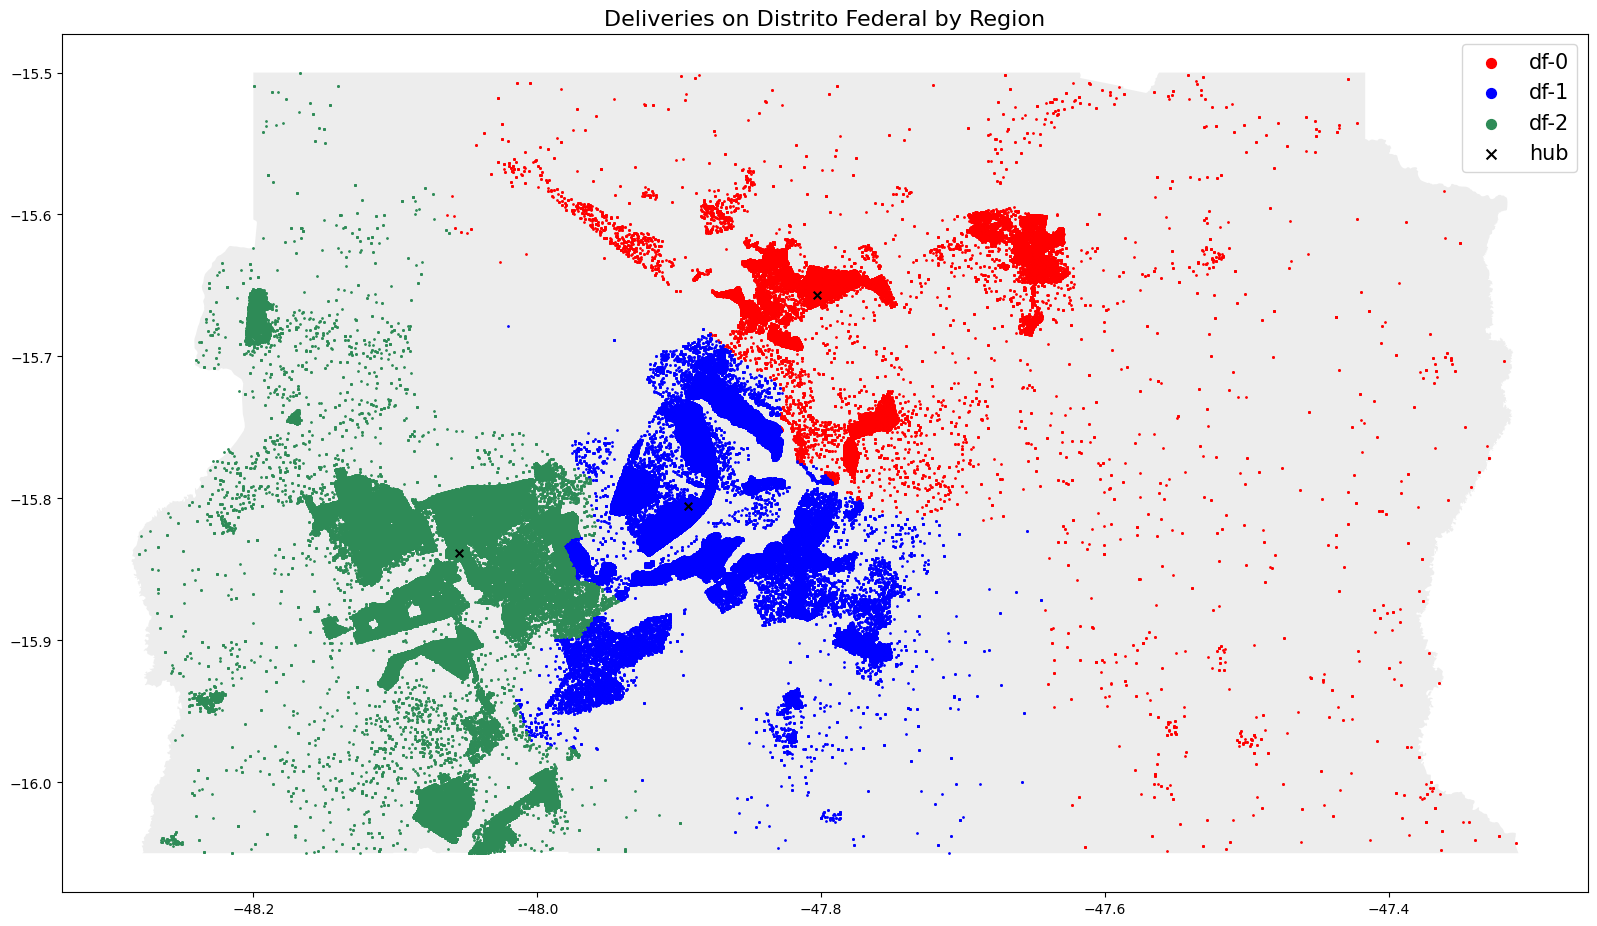

In [50]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(50/2.54, 50/2.54))

mapa.plot(ax=ax, alpha=0.4, color='lightgrey')

geo_deliveries_df.query("region == 'df-0'").plot(ax=ax, markersize=1, color='red', label='df-0')
geo_deliveries_df.query("region == 'df-1'").plot(ax=ax, markersize=1, color='blue', label='df-1')
geo_deliveries_df.query("region == 'df-2'").plot(ax=ax, markersize=1, color='seagreen', label='df-2')

geo_hub_df.plot(ax=ax, markersize=30, marker='x', color='black', label='hub')

plt.title('Deliveries on Distrito Federal by Region', fontdict={'fontsize': 16})
legend = plt.legend(prop={'size': 15})
for handle in legend.legend_handles:
    handle.set_sizes([50])
    
plt.savefig('../working/deliveries_map.png', dpi=200)

One *insight* that we have from this map is that hubs 0 and 2 make deliveries distant from the center and between each other. 

## 3.2 - Graphs

Now, using Seaborn we can visualize the proportion in which each region displayed above is present in the dataset.

In [51]:
data = pd.DataFrame(deliveries_df[['region', 'vehicle_capacity']].value_counts(normalize=True)).reset_index()
data.rename(columns={
    'proportion': 'region_percent'
}, inplace=True)
data.head()

,region,vehicle_capacity,region_percent
0,df-1,180,0.478988
1,df-2,180,0.410783
2,df-0,180,0.110229


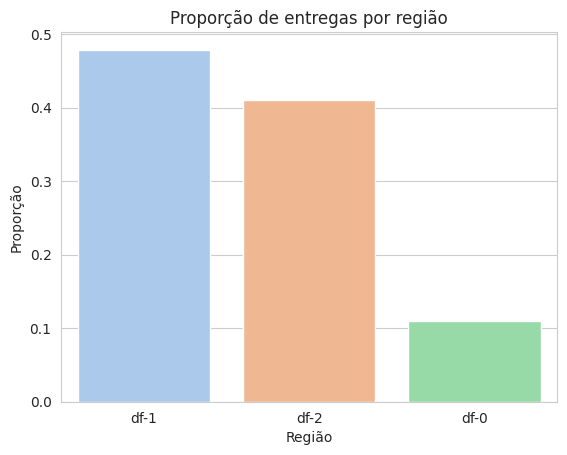

In [52]:
import seaborn as sns

with sns.axes_style('whitegrid'):
    grafico = sns.barplot(data=data, x='region', y='region_percent', errorbar=None, palette='pastel')
    grafico.set(title='Proporção de entregas por região', xlabel='Região', ylabel='Proporção')
    
plt.savefig('../working/delivery_proportion.png', dpi=200)    

In short, the distribution of deliveries is pretty much concentrated in the hubs of regions 1 and 2, and very little on region 0. However, the vehicle capacity is the same everywhere, and an improvement would be to vary the capacity depending on the hub region.